## Open CV Basic operations

### 1. import libreries & load files

In [3]:
# import required libreries
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import sys 
import os 
import pafy
%matplotlib inline 

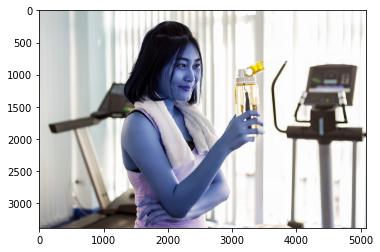

In [64]:
# Load file and display
img = cv2.imread('test.jpg')
plt.imshow(img)
plt.show()

### 2. Image convertion and spliting channel

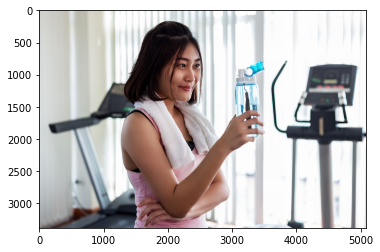

In [62]:
# Converting image to RGB 
# 1. Numpy Method 
rgb_img = img[:, :, ::-1]
plt.imshow(rgb_img)
plt.show()

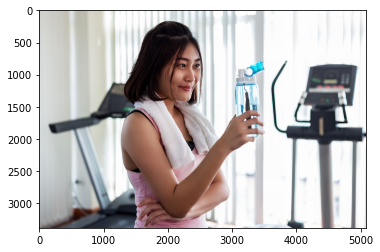

In [65]:
# 2. cv2 librery to conver BRG to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

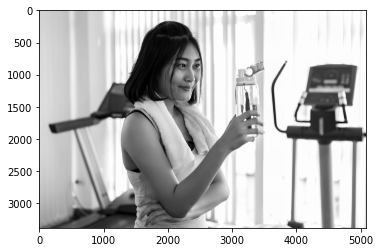

In [37]:
# Convert image to Gray scale
# 1. numpy method 
# RGB[A] to Gray:Y←0.299⋅R+0.587⋅G+0.114⋅B
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]
gray_img = .299*r + .587*g + .114*b

plt.imshow(gray_img, cmap='gray')
plt.show()

In [67]:
# spliting RGB using openCV
r, g , b = cv2.split(img)
print(r.shape, g.shape, b.shape)

(3386, 5079) (3386, 5079) (3386, 5079)


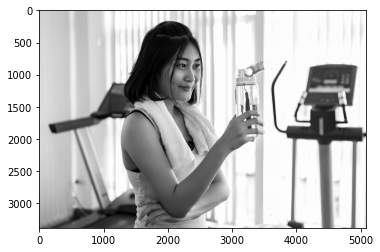

In [39]:
# 2 opencv method 
gray_img2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img2, cmap='gray')
plt.show()

### 3. Access pixel values and view image properties

In [44]:
# Image propetie
print(img.shape)
print(img.size)
print(img.dtype)
print(gray_img.shape)

(3386, 5079, 3)
51592482
uint8
(3386, 5079)


In [20]:
# Access pixel values 
px = img[100,100]
print('RGB value at 100,100 pix:',px)

# get blue value of a pixel 
vlue_val = img[100,100,2]
print('Blue value in that pixel',vlue_val)

# modify the pixel value
img[100,100] = [255,255,255]
print(img[100,100])

RGB value at 100,100 pix: [208 209 204]
Blue value in that pixel 204
[255 255 255]


In [23]:
# item & itemset use to get pixel value

# Get red value
print(img.item(10,10,0))

# modify red value
img.itemset((10,10,0),0)
print(img.item(10,10,0))

206
0


### 4. Region of Image ROI

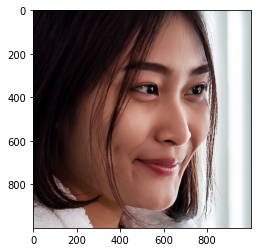

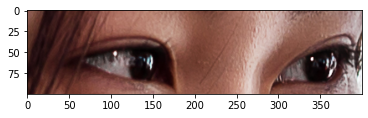

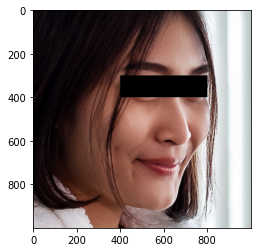

In [66]:
# Finding face
face = img[500:1500, 1700:2700]
plt.imshow(face)
plt.show()

# Finding eyes
eyes = face[300:400,400:800]
plt.imshow(eyes)
plt.show()

# make eyes portion black patch 
face[300:400,400:800] = [0,0,0]
plt.imshow(face)
plt.show()

### 5. Making borders
**cv2.copyMakeBorder()** is useful function for `convolution` operations like makeing zero padding. Features of the function is given bellwo: 
- cv2.BORDER_CONSTANT: Add a constant colored borer. 
- cv2.BORDER_REFLECT: Border will be mirror reflection of the border elemets 
- cv2.BORDER_REPLICATE_101: similar to border reflection
- cv2.BORDER_WRAP: 

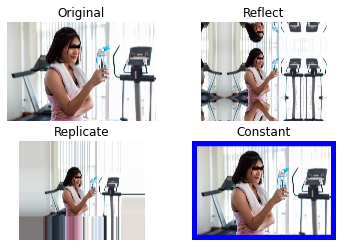

In [93]:
blue = [0,0,255]
reflect = cv2.copyMakeBorder(img, 1500,1500,1500,1500, cv2.BORDER_REFLECT)
replicate = cv2.copyMakeBorder(img, 1500,1500,1500,1500, cv2.BORDER_REPLICATE)
constant = cv2.copyMakeBorder(img, 200,200,200,200, cv2.BORDER_CONSTANT, value = blue)

plt.subplot(221),plt.imshow(img),plt.title('Original'), plt.axis('off')
plt.subplot(222), plt.imshow(reflect), plt.title('Reflect'), plt.axis('off')
plt.subplot(223), plt.imshow(replicate), plt.title('Replicate'), plt.axis('off')
plt.subplot(224), plt.imshow(constant), plt.title('Constant'), plt.axis('off')
plt.show()

### 6. Image reshape

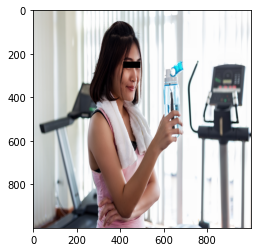

In [112]:

img_reshaped = cv2.resize(img, (1000,1000), interpolation = cv2.INTER_AREA)
plt.imshow(img_reshaped)
plt.show()

## Arithmetic operations on Images

### 1. Image addition

In [97]:
x = np.uint8([250])
y = np.uint8([10])

print(cv2.add(x,y))
print(x+y)

[[255]]
[4]


### 2. Image Blending
$g(x)=(1 -\alpha)f_0(x)+\alpha f_1(x)$

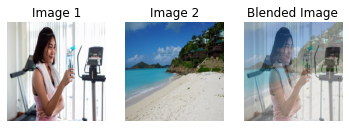

In [117]:
# load images
img1 = cv2.imread('test.jpg')
img2 = cv2.imread('test2.jpg')
img1 = img1[:,:,::-1]
img2 = img2[:,:,::-1]

# reshape the images to same dimention 
dim  = (1000,1000)
img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
img2 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)

# blending images 
img3 = cv2.addWeighted(img1,0.5,img2,0.5,0)

plt.subplot(231),plt.imshow(img1),plt.title('Image 1'), plt.axis('off')
plt.subplot(232),plt.imshow(img2),plt.title('Image 2'), plt.axis('off')
plt.subplot(233),plt.imshow(img3),plt.title('Blended Image'), plt.axis('off')
plt.show()

### 3. Bitwise operations 

In [129]:
# load images
img1 = cv2.imread('test.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('logo.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

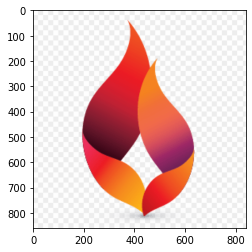

In [130]:
# create Roi
rows, cols, chennels = img2.shape
roi = img2[:rows, :cols]
plt.imshow(roi)
plt.show()

In [135]:
# create a mask and inverse mask of image2
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

In [ ]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1)
plt.show()

# Performace Measurements

In [4]:
img1 = cv2.imread('test.jpg')

e1 = cv2.getTickCount()
for i in range(5, 49, 2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency() 
print(t)

38.188175365


# Load vedio files

## import from url

In [5]:
import pafy
from matplotlib.animation import FuncAnimation

In [18]:
url = 'https://www.youtube.com/watch?v=ZJvVihqO1NM'
video = pafy.new(url)
print(vPafy.title)

15 Easy Juggling/Freestyle Skills | Learn These Simple Football Freestyle Tricks


In [19]:
streams = video.streams 
for i in streams: 
    print(i) 

normal:mp4@640x360
normal:mp4@1280x720


In [21]:
# get best resolution regardless of format 
best = video.getbest() 
print(best)

normal:mp4@1280x720


In [22]:
best.download() 

In [26]:
video = pafy.new(url)
best = video.getbest(preftype="mp4")

capture = cv2.VideoCapture()
capture.open(best.url)

True

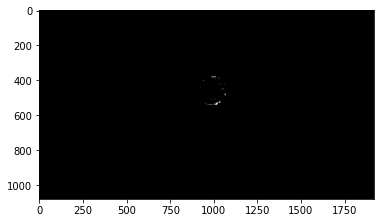

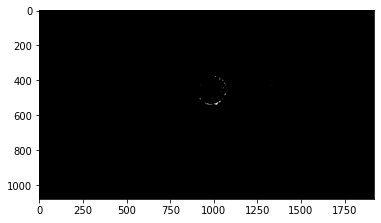

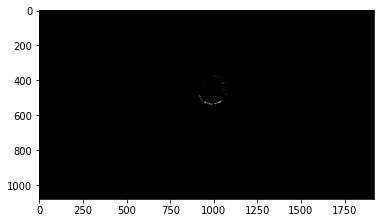

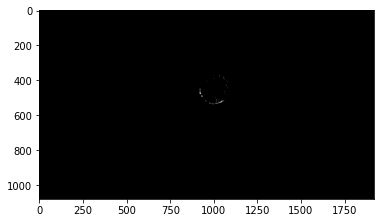

In [17]:
cap = cv2.VideoCapture('Football.mp4')

for i in range(1000):
    # take each frame, 
    _, frame = cap.read()

    # convert BGR to HSV 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of orange color in HSV
    lower_org = np.array([5,50,50])
    upper_org = np.array([15,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_org, upper_org)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    #plt.imshow(hsv)
    #plt.imshow(mask, cmap='gray')
    plt.imshow(res, cmap='gray')
    plt.show()
   

